In [11]:
%matplotlib inline

In [51]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
import re
import os.path

In [2]:
# test result function
def frobenius_norm(M1, M2):
    #print M1
    #print M2
    total = 0.0
    for a,b in zip(M1, M2):
        for c, d in zip(a, b):
            total += (c - d)*(c - d)
    return total

In [3]:
# dimension of each example in the dataset
d = 15
# k is the top pricipal calculated by the eigenvectors, right now just fix it
k = 5
# fix the learning rate
learning_rate = 0.00001
# preprocess the data
data_set = []
data_set_done = []
if os.path.exists('new_data'):
    with open('new_data') as data:
        for line in data:
            data_set_done.append(map(float, line.split()))

else:
    with open('adult.data.txt') as data:
        for line in data:
            # '\s' matches whitespace
            tmp = re.sub(r'\s', '', line).split(',')
            data_set.append(tmp)
    print data_set

    feature_vector_size = len(data_set[0])
    print "feature vector is  " ,feature_vector_size
    print "data set size is ", len(data_set)
    tmp = data_set[0]

    # find out which feature is not a digit
    non_digit_index = []
    for i in range (0,feature_vector_size):
        if tmp[i].isdigit():
            continue
        else:
            non_digit_index.append(i)
    print non_digit_index

    # make each string feature to become a number

    # Copy
    modified_data_set= []
    for item in data_set:
        modified_data_set.append(item)


    print "data before processed dimension is ", len(modified_data_set[0])
    #print modified_data_set
    item_list = []
    count = 0
    dimension_to_increase = 0
    # for all the non_digit index, count how many differnt items
    for i in non_digit_index:
        # clear the item list to find different string for same feature
        items = []
        # loop through the whole data set
        for vector in data_set:
            # get the corresponsding item
            tmp = vector[i]
            # it already in the list
            if tmp in items:
                continue
            else:
                # otherwise append to the list
                items.append(tmp)
        dimension_to_increase = dimension_to_increase + len(items)-1
        #print "item is "
        #print items
        #print "\n\n"
        # loop through the whole data set to replace the feature
        for j in range(len(modified_data_set)):
            v = modified_data_set[j]
            #print v
            # get the item in the vector
            #print "accessing ", i+count
            tmp = v[i+count]
            index  = items.index(tmp)
            front = v[0:i+count]
            end = v[i+1+count:len(v)]
            zeros = [0]*len(items)
            zeros[index] = 1
            front.extend(zeros)
            front.extend(end)
            modified_data_set[j] = front
            #print "result is ", modified_data_set[j]
            #v[i] = float(index)
        count = count + len(items)-1
    for v in modified_data_set:
        v = map(float, v)
        data_set_done.append(v)
    print "dimension to increase ", dimension_to_increase
    print "data processed dimension is ", len(data_set_done[0])
    #print data_set_done
    print "size of data set done is ", len(data_set_done)

f = open('new_data', 'w')
for vector in data_set_done:
    for num in vector:
        f.write(str(num)+" ")
    f.write("\n")
f.close()

In [16]:
# U and V are d x k dimension matrix
v = np.random.rand(len(data_set_done[0]),k)
#print "V start with, ", v
u = np.random.rand(len(data_set_done[0]),k)
#print "U start with, ", u

# data set size covariance matrix M
N = len(data_set_done)
M = np.array(data_set_done[0]) * np.transpose(np.array(data_set_done[0])) / N
for i in range(1, len(data_set_done)):
    M = M + (np.array([data_set_done[i]]) * np.transpose(np.array([data_set_done[i]]))) / N
print "M is "
print M

U, s, V = np.linalg.svd(M, full_matrices=True)

print "U is", U
print "V is", V
distance = []
S=np.diag(s)
optimal = frobenius_norm(M, np.dot(U, np.dot(S,V)))
print "optimal is ", optimal
#distance.append(frobenius_norm(M, np.dot(U, np.dot(S,V))))
#distance.append(frobenius_norm(M, np.dot(U, np.dot(s,V))

print distance

# SGD function
# run the whole optimization process 10 times
for j in range(0, 100000):
    for t in range(0, 100):
            #print (data_set[t] * np.transpose(data_set[t]) - np.dot(u,np.transpose(v)))
            # need to do np.dot() for matrix multiplication
        u = u + learning_rate * np.dot(M - np.dot(u,np.transpose(v)), v)
        #u = u - learning_rate * np.dot((data_set_done[t] * np.transpose(data_set_done[t]) - np.dot(u,np.transpose(v))), v)
            #print "u is"
            #print u
    # do v 100 rounds
    #for counter in range (0,10):
        #print counter
        # update v len(data_set) iterations
    for t in range(0, 100):
        v = v + learning_rate * np.dot(M - np.dot(u, np.transpose(v)), u)
        #v = v - learning_rate * np.dot((data_set_done[t] * np.transpose(data_set_done[t]) - np.dot(u, np.transpose(v))), u)
            #print "v is "
            #print v
#     print "u is"
#     print u
#     print "v is"
#     print v
    # print "result is"

    # print np.dot(u, np.transpose(v))
    result = frobenius_norm(M, np.dot(u,np.transpose(v)))
    #print result
    distance.append(result)
#print distance

M is 
[[  1.67459915e+03   1.57089770e+00   3.50935168e+00   2.56490280e+01]
 [  1.61757931e+00   3.98636406e-02   0.00000000e+00   0.00000000e+00]
 [  3.55606400e+00   3.07115875e-05   7.80381438e-02   0.00000000e+00]
 [  2.56957403e+01   3.07115875e-05   0.00000000e+00   6.97030189e-01]]
U is [[ -9.99879535e-01  -1.44026855e-02   4.37200764e-03  -3.79000455e-03]
 [ -9.65624455e-04  -8.36676973e-02   3.21253651e-01   9.43289391e-01]
 [ -2.12286401e-03  -2.13455456e-01  -9.30412873e-01   2.97933125e-01]
 [ -1.53452583e-02   9.73256928e-01  -1.76377046e-01   1.46378322e-01]]
V is [[ -9.99880048e-01  -9.37758710e-04  -2.09497964e-03  -1.53173775e-02]
 [ -1.43971548e-02  -8.17449317e-02  -2.11797035e-01   9.73782575e-01]
 [  4.34250593e-03   3.19375564e-01  -9.31194941e-01  -1.75659822e-01]
 [ -3.70876811e-03   9.44095406e-01   2.96670875e-01   1.43723696e-01]]
optimal is  1.05753779723e-27
[]


1000


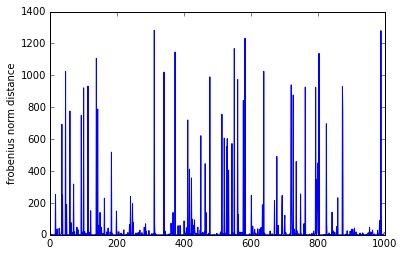

In [56]:
#print distance
# plot the distance 
x_axis = random.sample(distance,1000)
    
print len(x_axis)
'''
print len(x_axis)
print len(distance)
plt.plot(x_axis,distance)
plt.xlim(0,200000)
plt.ylim(0,4000000)
'''
plt.plot(x_axis)
plt.ylabel('frobenius norm distance')
plt.show()